In [2]:
from isng_1d import Ising1D
import matplotlib.pyplot as plt
import numpy as np




/Users/ruiqi/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:

betas = np.linspace(1e-1, 1, 20)
betas_fine = np.linspace(1e-1, 1, 200)
n = 10000
iter = 100000
Us = []

for beta in betas:
    m = Ising1D(n, 1 / beta, 0, J=1, mu=1)
    m.run(iter)
    
    Us.append(m.get_H())

def ana_U(betas):
    return -n * np.tanh(betas)


100%|██████████| 100000/100000 [00:04<00:00, 23645.30it/s]


In [ ]:

def d(x, y):
    x = np.array(x)
    y = np.array(y)
    x = (x[1:] - x[:-1])
    return (y[1:] - y[:-1]) / x

def avg(x):
    x = np.array(x)
    return (x[:-1] + x[1:]) / 2


betas = np.linspace(1e-1, 1, 20)
betas_fine = np.linspace(1e-1, 1, 200)


fig, ax = plt.subplots(1, 1)
ax2 = ax.twinx()
ax.scatter(1 / betas, np.array(Us), label='MC, U')
ax.plot(1 / betas_fine, ana_U(betas_fine), label='theory, U')

ax2.scatter(avg(1 / betas), d(1 / betas, Us), label='MC, C', color='C1')
ax2.plot(avg(1 / betas_fine), d(1 / betas_fine, ana_U(betas_fine)), label='theory, C', color='C1')

ax.set_xlabel('T')
ax.set_ylabel('Energy U / a.u.')
ax2.set_ylabel('Specific heat C / a.u.')
ax.legend(loc='lower right', bbox_to_anchor=(1, 0.1))
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.3))

In [4]:

beta = 1

n = 10000
iter = int(1e6)
Us = []
gs = []

m = Ising1D(n, 1 / beta, 0, J=1, mu=1)
m.run(iter)




100%|██████████| 1000000/1000000 [00:43<00:00, 22889.58it/s]


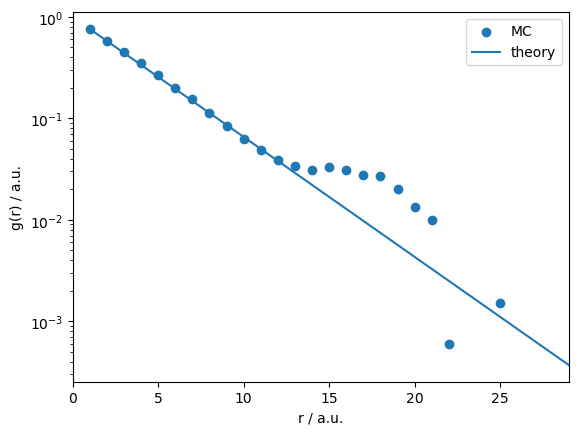

In [6]:
rs = np.arange(1, 30)

gs = []
for r in rs:
    gs.append((m.s[r:] * m.s[:-r]).mean())

def ana_g(rs):
    rs = np.array(rs)
    return np.tanh(beta) ** rs

fig, ax = plt.subplots(1, 1)
ax.scatter(rs, gs, label='MC')
ax.plot(rs, ana_g(rs), label='theory')
ax.legend()
ax.set_xlabel('r / a.u.')
ax.set_ylabel('g(r) / a.u.')
ax.set_xlim(0, rs[-1])

ax.set_yscale('log')
fig.savefig('correlation_n_1e5_iter_1e6', dpi=300)